## <center><font color=navy>Big Data Economics</font></center>
### <center>Model Selection</center>
#### <center>Ali Habibnia</center>

<center> Assistant Professor, Department of Economics, </center>
<center> and Division of Computational Modeling & Data Analytics at Virginia Tech</center>
<center> habibnia@vt.edu </center> 

### Readings:

1. ***Chapter 6,*** Graham Elliott, and Allan Timmermann, Economic Forecasting, Princeton University Press, 2016.
2. ***Chapter 7.5 - 7.6 - 7.7,*** [The Elements of Statistical Learning: Data Mining, Inference, and Prediction](https://hastie.su.domains/ElemStatLearn/printings/ESLII_print12_toc.pdf.download.html).
3. **Claeskens, G., & Hjort, N. L. (2008).** *Model Selection and Model Averaging.* Cambridge University Press. 

4. **Akaike, H. (1974).** *A New Look at the Statistical Model Identification.* IEEE Transactions on Automatic Control, 19(6), 716–723.  

5. **Schwarz, G. (1978).** *Estimating the Dimension of a Model.* The Annals of Statistics, 6(2), 461–464.  

6. **Burnham, K. P., & Anderson, D. R. (2002).** *Model Selection and Multimodel Inference: A Practical Information-Theoretic Approach.* Springer.  

7. **Stone, M. (1977).** *An Asymptotic Equivalence of Choice of Model by Cross-Validation and Akaike's Criterion.* Journal of the Royal Statistical Society, Series B, 39(1), 44–47.  

### Model Selection in Frequentist Econometrics

This notebook explores model selection techniques within the frequentist framework, emphasizing metrics such as AIC, BIC, and adjusted \(R^2\) to compare competing models post-estimation. We also discuss the philosophical differences between frequentist and Bayesian approaches, and contrast the traditional statistical focus on in-sample goodness-of-fit and parameter significance with the machine learning emphasis on out-of-sample prediction accuracy via cross-validation.

In empirical econometrics, selecting the appropriate model is as crucial as its estimation, particularly when dealing with high-dimensional data. With many candidate models available, a rigorous evaluation is needed to balance fit and parsimony. Overly complex models may overfit the data, capturing noise rather than signal, while overly simplistic models may omit relevant variables, leading to bias.

We also briefly reflect on two philosophical frameworks in model evaluation:

- **Frequentist vs. Bayesian:**
- **Statistical Inference vs. ML Predictive Performance:**

<div class="alert alert-block alert-info">
<center>***Frequentism vs Bayesianism***</center>
One of the initial concepts introduced to scientists in the field of statistics is the existence of two distinct methodologies:  Frequentist and Bayesian Paradigms. The core of the debate between frequentists and Bayesians lies in their differing interpretations of what probability signifies. In our big data class, the majority of the topics will be centered around the frequentist approach. However, time permitting, we might delve into Bayesian methodologies, such as Bayesian Vector Autoregression (B-VAR).


<img src="images/bayvsfre.jpg"  width="600">


- **Frequentist Approach:**  
  Relies on the sampling properties of estimators (e.g., consistency, efficiency) and uses criteria like AIC and BIC that are based solely on the observed likelihood and model complexity. This approach avoids the explicit use of prior distributions, focusing on the evidence provided by the data.                                      


- **Bayesian Approach:**  
  Incorporates prior beliefs about model parameters and computes posterior probabilities for models. Methods such as the Bayes factor provide a probabilistic framework for model comparison. Although Bayesian methods offer a coherent framework for incorporating uncertainty, they require careful specification of priors and computationally intensive procedures.
  </div>

### Basics of Bayesian Statistics

Just as a quick reveiw, Bayesian statistics is a subset of statistics in which probability expresses a degree of belief in an event. This belief may change as new evidence is presented. Bayesian statistics uses Bayes' Theorem to update the probabilities of hypotheses as more evidence or information becomes available.

#### Bayes' Theorem

At the core of Bayesian inference is Bayes' Theorem, which provides a principled way to update our probability estimates for hypotheses in light of new data. The theorem is expressed as:

$$
P(A|B) = \frac{P(B|A) \times P(A)}{P(B)}
$$

Where:
- $P(A|B)$ is the **posterior probability**: The updated probability of event A (hypothesis) occurring given that event B (evidence) is true.
- $P(B|A)$ is the **likelihood**: The probability of observing event B given A is true.
- $P(A)$ is the **prior probability**: The initial belief about the probability of event A before observing B.
- $P(B)$ is the **evidence or marginal likelihood**: The total probability of observing event B under all possible conditions. It serves as a normalizing constant to ensure that the posterior probabilities sum to one.

#### Relation to Conditional Probability

Conditional probability measures the likelihood of an event given that another event has occurred. Bayes' Theorem leverages this concept by "reversing" the conditioning:

- From $P(B|A)$, the probability of B given A, we can compute $P(A|B)$, the probability of A given B, by incorporating our prior belief about A ($P(A)$) and normalizing by the evidence ($P(B)$).

This inversion is fundamental to Bayesian updating, enabling us to reassess the plausibility of a hypothesis in the light of new information.

#### Applying Bayes' Theorem

The process of Bayesian updating can be summarized as follows:

1. Start with a prior belief (`P(A)`), which is our initial assumption or knowledge about the probability of an hypothesis.
2. Collect evidence and calculate the likelihood (`P(B|A)`), which quantifies how probable the observed data is under the hypothesis.
3. Use Bayes' Theorem to update the prior belief into a posterior belief (`P(A|B)`), which takes into account the new evidence.
4. The posterior belief becomes the new prior if more evidence is to be considered, iterating the process.

Bayesian statistics is particularly powerful in situations where information is updated or accumulated over time, allowing for dynamic adjustments to predictions and hypotheses.


<table>
<thead>
<tr>
<th style="text-align:center;">Aspect</th>
<th style="text-align:center;">Frequentist Approach</th>
<th style="text-align:center;">Bayesian Approach</th>
</tr>
</thead>
<tbody>
<tr>
<td style="text-align:center;">Interpretation of Probability</td>
<td style="text-align:center;">Probability is defined as the limit of the relative frequency of an event as the number of trials goes to infinity.</td>
<td style="text-align:center;">Probability is interpreted as a measure of belief or certainty about an event.</td>
</tr>
<tr>
<td style="text-align:center;">Parameters</td>
<td style="text-align:center;">Parameters are considered fixed but unknown quantities that we aim to estimate.</td>
<td style="text-align:center;">Parameters are treated as random variables with their own probability distributions.</td>
</tr>
<tr>
<td style="text-align:center;">Inference</td>
<td style="text-align:center;">Inference is made by estimating parameters and assessing the variability of these estimates without using prior information.</td>
<td style="text-align:center;">Inference incorporates prior knowledge or beliefs, which are updated with new data through the use of Bayes' theorem.</td>
</tr>
<tr>
<td style="text-align:center;">Confidence vs. Credible Intervals</td>
<td style="text-align:center;">Uses confidence intervals, which, in repeated sampling, would contain the true parameter a certain percentage of the time.</td>
<td style="text-align:center;">Uses credible intervals, which represent the probability of the parameter lying within a certain range, given the data.</td>
</tr>
<tr>
<td style="text-align:center;">Hypothesis Testing</td>
<td style="text-align:center;">Relies on the concept of null hypothesis significance testing (NHST) and p-values to make decisions about hypotheses.</td>
<td style="text-align:center;">Focuses on comparing the probabilities of different hypotheses, using the data and prior information.</td>
</tr>
<tr>
<td style="text-align:center;">Decision Making</td>
<td style="text-align:center;">Decisions are often based on whether the test statistic falls within a critical region, without incorporating prior information.</td>
<td style="text-align:center;">Decisions are made based on the posterior distribution of parameters, taking into account both the data and prior beliefs.</td>
</tr>
<tr>
<td style="text-align:center;">Approach to Data</td>
<td style="text-align:center;">Views data as a repeatable random sample—there is a notion of long-run frequencies in repeated sampling.</td>
<td style="text-align:center;">Treats data as fixed and focuses on updating the beliefs about the parameters based on the data observed.</td>
</tr>
</tbody>
</table>


## Model Selection Goals

- When we have many variables/predictors (with many possible interactions), it can be difficult to find a good model.
- Which main effects do we include?
- Which interactions do we include?

> Model selection tries to answer to this questions.
> we need:
>- a criterion or benchmark to compare two models.
>- a search strategy.

## Model Fitting vs Model Selection

The difference between *model fitting* and *model selection* is often a cause of confusion.
**Model fitting** proceeds by assuming a particular model is true, and tuning the model so it provides the best possible fit to the data. **Model selection** (which includes *model comparison*, and *model evaluation*) , on the other hand, asks the larger question of whether the assumptions of the model are compatible with the data.

Let's make this more concrete.
By *model* here I essentially mean a formula, usually with tunable parameters, which quantifies the likelihood of observing your data.
For example, your model might consist of the statement, "the $(x, y)$ observations come from a straight line, with known normal measurement errors $\sigma_y$".
Labeling this model $M_1$, we can write:

$$
y_{M_1}(x;\theta) = \theta_0 + \theta_1 x\\
y \sim \mathcal{N}(y_{M_1}, \sigma_y^2)
$$

where the second line indicates that the observed $y$ is normally distributed about the model value, with variance $\sigma_y^2$.
There are two tunable parameters to this model, represented by the vector $\theta = [\theta_0, \theta_1]$ (i.e. the slope and intercept).

Another model might consist of the statement "the observations $(x, y)$ come from a quadratic curve, with known normal measurement errors $\sigma_y$".
Labeling this model $M_2$, we can write:

$$
y_{M_2}(x;\theta) = \theta_0 + \theta_1 x + \theta_2 x^2\\
y \sim \mathcal{N}(y_{M_2}, \sigma_y^2)
$$

There are three tunable parameters here, again represented by the vector $\theta$.

Model fitting, in this case, is the process of finding constraints on the values of the parameters $\theta$ within each model.
That is, it allows you to make statements such as, "assuming $M_1$ is true, this particular $\theta$ gives the best-fit line" or "assuming $M_2$ is true, this particular vector $\theta$ gives the best-fit curve."
Model fitting proceeds without respect to whether the model is capable of describing the data well; it just arrives at the best-fit model *under the assumption that the model is accurate*.

> Model selection, on the other hand, is not concerned with the parameters themselves, but with the question of whether the model is capable of describing the data well.
That is, it allows you to say, "for my data, a line ($M_1$) provides a better fit than a quadratic curve ($M_2$)".


- In particular, we wish to select the model that performs optimally, both with respect to the training data (in-sample data) and to external data (out-of-sample).


- How many variables should be included in the model? Here's one idea:
  <br>  
    - Try different models, and only keep predictors in the model if they have small p-values. (Stepwise regression, our next session topic!)
    - Check whether the adjusted R-squared value goes up when you add new predictors.

- What functional form should be used in fitting the model?
- What sort of polynomial relationship best describes the relationship?

## Example: Advertising Data

In [19]:
# imports
import pandas as pd
import matplotlib.pyplot as plt

# this allows plots to appear directly in the notebook
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
# read data into a DataFrame
data = pd.read_csv('https://www.statlearning.com/s/Advertising.csv', index_col=0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
# print the shape of the DataFrame
data.shape

(200, 4)

In [4]:
# this is the standard import if you're using "formula notation" (similar to R)
import statsmodels.formula.api as smf

# create a fitted model in one line
lm = smf.ols(formula='sales ~ TV', data=data).fit()

# print the coefficients
lm.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [5]:
# print the confidence intervals for the model coefficients
lm.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [6]:
# print the p-values for the model coefficients
lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [7]:
# print the R-squared value for the model
lm.rsquared

0.611875050850071

In [8]:
# create a fitted model with all three features
lm = smf.ols(formula='sales ~ TV + radio + newspaper', data=data).fit()

# print the coefficients
lm.params

Intercept    2.938889
TV           0.045765
radio        0.188530
newspaper   -0.001037
dtype: float64

In [9]:
# print the R-squared value for the model
lm.rsquared

0.8972106381789522

In [10]:
# print the p-values for the model coefficients
lm.pvalues

Intercept    1.267295e-17
TV           1.509960e-81
radio        1.505339e-54
newspaper    8.599151e-01
dtype: float64

In [11]:
# print a summary of the fitted model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 05 Feb 2025   Prob (F-statistic):           1.58e-96
Time:                        16:47:07   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
# only include TV and Radio in the model
lm = smf.ols(formula='sales ~ TV + radio', data=data).fit()
lm.rsquared_adj

0.8961505479974429

In [13]:
# add Newspaper to the model (which we believe has no association with Sales)
lm = smf.ols(formula='sales ~ TV + radio + newspaper', data=data).fit()
lm.rsquared_adj

0.8956373316204668

In [14]:
# only include TV and Radio in the model
lm = smf.ols(formula='sales ~ TV', data=data).fit()
lm.bic

1048.687962269444

In [15]:
# only include TV and Radio in the model
lm = smf.ols(formula='sales ~ TV + radio', data=data).fit()
lm.bic

788.2890508023244

>From a model selection perspective, adjusted R², AIC, and BIC represent three distinct ways of formalizing the same fundamental tradeoff:

>Fit versus complexity.

>They differ in what notion of “fit” they optimize and how strongly they penalize **overparameterization**.

#### Naive Approach: Comparing Maximum Likelihoods

One common mistake is to assume that we can select between models via *the value of the maximum likelihood*.
While this works in some special cases, it is not generally applicable. The model with more variables yields a higher log-likelihood, but this **does not** necessarily mean it is the better model!

The problem is that when a model has more degrees of freedom, will **always** give an equal or larger maximum likelihood, regardless of the data! This trend holds generally: as you increase model complexity, the maximum likelihood value will (almost) always increase!


#### Comparing R2 and Adjusted R2

**R-squared will always increase as you add more features to the model**, even if they are unrelated to the response. Thus, selecting the model with the highest R-squared is not a reliable approach for choosing the best linear model.

There is alternative to R-squared called **adjusted R-squared** that penalizes model complexity.

<img src="images/regres.png"  width="300">



Coefficient of Determination (R²):
$$ R^2 = \frac{SSR}{SST} = 1 - \frac{SSE}{SST} $$
Sum of Squares Total (SST):
$$ SST = \sum (Y - \bar{Y})^2 $$
Sum of Squares Regression (SSR):
$$ SSR = \sum (\hat{Y} - \bar{Y})^2 $$
Sum of Squares Error (SSE):
$$ SSE = \sum (Y - \hat{Y})^2 $$

These satisfy the fundamental decomposition:

$$ SST = SSR + SSE $$

.
.
$$R^2_{adjusted} = \frac{SSR}{SST} = 1 − \frac{\frac{SSE}{(N − p − 1))}}{\frac{SST}{(N − 1)}},$$

Equivalently,

$$ R^2_{adjusted} = 1 - (1 - R^2) \frac{(N - 1)}{(N - p - 1)} $$

Where:
- $R^2$ is the sample R-squared.
- $p$ is the number of predictors.
- $N$ is the total sample size.


#### Interpretation

Observe that

$$SSR / (N − p − 1)$$

is an unbiased estimator of $σ²$.

$$R^2_{adjusted} = 1 − (σ̂² / Var(Y)),$$

where $σ̂²$ is the unbiased residual variance.

So, $R^2_{adjusted}$ selects the model that minimizes the estimated error variance relative to total variation.


### Information-theoretic Model Selection (AIC and BIC)

You will be able to:

- Understand that both AIC and BIC are information criteria that also can be used to perform model selection
- Understand how AIC and BIC use likelihood


Information criteria (IC) choose models by trading off model fit against a penalty
for model complexity as measured by the number of free parameters that have to
be estimated for the models. Several information criteria have been suggested in
the literature, the two most popular of which are the Bayes information criterion
(Schwarz BIC, SBIC, or BIC) proposed by Schwarz (1978) and the Akaike information
criterion (AIC) due to Akaike (1974).

Information criteria employ different strategies to trade-off fit against parsimony.
The Bayesian information criterion selects the model with the highest posterior
probability given the data. To choose a single model from the candidate set, the
models are ranked according to their posterior probabilities and the model with the
highest posterior probability is chosen. The Akaike information criterion seeks to minimize the (Kullback–Leibler) distance between the density of a candidate model
and the density of the true (unknown) model.

#### The AIC

One approach to model selection is to use an information-theoretic criterion to identify the most appropriate model. Akaike (1973) found a formal relationship between Kullback-Leibler information (a dominant paradigm in information and coding theory) and likelihood theory. Akaike's Information Criterion (AIC) is an estimator of expected relative K-L information based on the maximized log-likelihood function, corrected for asymptotic bias. 

<br>
<center> AIC(model) = -2  $\cdot$ log-likelihood(model) + 2 $\cdot$ (length of the parameter space)</center>

$$\text{AIC} = −2 \log(L(\theta|data)) + 2p$$

AIC balances the fit of the model (in terms of the likelihood) with the number of parameters required to achieve that fit. We can easily calculate AIC from the residual sums of squares as:

$$\text{AIC} = n \log(\text{RSS}/n) + 2p$$

where $p$ is the number of parameters in the model. Notice that as the number of parameters increase, the residual sum of squares goes down, but the second term (a penalty) increases.

To apply AIC to a model selection problem, we choose the model that has the lowest AIC value.

The AIC is generally used to compare each candidate model. The nice thing about the AIC is that for every model that uses Maximum Likelihood Estimation, the log-likelihood is automatically computed, and as a consequence the AIC is very easy to calculate.
The AIC acts as a penalised log-likelihood criterion, giving a balance between a good fit (high value of log-likelihood) and complexity (complex models are penalized more than fairly simple ones). The AIC is unbounded so can take any type of value, but the bottom line is that when comparing models, the model with the lowest AIC should be selected.
Note that directly comparing the values of log-likelihood maxima for different models (without including the penalty) is not good enough for model comparison, because including more parameters in a model will always give rise to an increased value of the maximum likelihood. Because of that reason, searching for the model with maximal log-likelihood would always lead to the model with the most parameters. The AIC balances this by penalizing for number of parameters, hence searching for models with few parameters but fitting the data well. data well.

> It makes rather stringent assumptions about the form of the likelihood, and so cannot be universally applied.

#### The BIC

The BIC (Bayesian Information Criterion) is very similar to the AIC and emerged as a Bayesian response to the AIC, but can be used for the exact same purposes. The idea is to select the candidate model with the highest probability given the data. This idea can be formalised inside a Bayesian framework, involving prior probabilities on candidate models along with prior densities on all parameters in the models. The penalty is slightly changed and depends on the number of rows to the data set:

<br>
<center> BIC(model) = -2 $\cdot$ log-likelihood(model) + log(number of observations) $\cdot$ (length of the parameter space)</center>



### Python Demonstrations

The following example uses simulated data to illustrate how to compare competing models using AIC, BIC, and adjusted \(R^2\). We simulate a dataset from a quadratic process and estimate polynomial regression models of varying degrees to explore the trade-offs between model complexity and fit.


   Degree          AIC          BIC  Adjusted R^2
0       1  1148.707031  1155.303666      0.661140
1       2   820.115849   830.010801      0.934785
2       3   820.668041   833.861310      0.934925
3       4   822.590143   839.081729      0.934617
4       5   818.399311   838.189215      0.936283


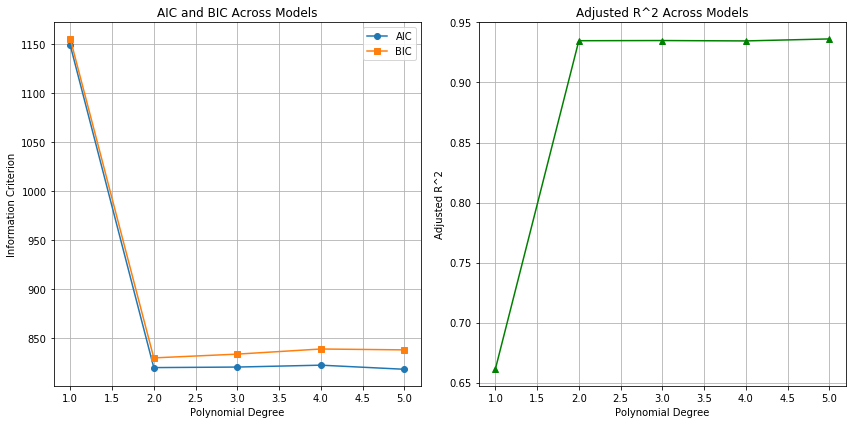

In [20]:
# Comparing Polynomial Regression Models Using AIC, BIC, and Adjusted R^2

import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)

# Simulate data from a quadratic process with additive noise
n = 200
x = np.linspace(-5, 5, n)
epsilon = np.random.normal(scale=2.0, size=n)
# True underlying process: y = 1 + 2*x - 0.5*x**2 + noise
y = 1 + 2 * x - 0.5 * x**2 + epsilon

# Organize the data in a DataFrame
data = pd.DataFrame({'x': x, 'y': y})

# Prepare a list to store metrics for models with increasing polynomial degree
model_metrics = []

# Fit polynomial regression models of degree 1 through 5
for degree in range(1, 6):
    # Create a copy of the original data
    data_poly = data.copy()
    
    # Generate additional polynomial features if degree > 1
    if degree > 1:
        for d in range(2, degree + 1):
            # Use a safe variable name (e.g., 'x_2' instead of 'x^2')
            data_poly[f'x_{d}'] = data_poly['x'] ** d

    # Build the regression formula dynamically using safe variable names
    predictors = ['x']
    if degree > 1:
        predictors += [f'x_{d}' for d in range(2, degree + 1)]
    formula = 'y ~ ' + ' + '.join(predictors)
    
    # Fit the model using Ordinary Least Squares (OLS)
    model = smf.ols(formula, data=data_poly).fit()
    
    # Append the performance metrics for the current model
    model_metrics.append({
        'Degree': degree,
        'AIC': model.aic,
        'BIC': model.bic,
        'Adjusted R^2': model.rsquared_adj
    })

# Convert the list of dictionaries to a DataFrame for display
metrics_df = pd.DataFrame(model_metrics)
print(metrics_df)

# Plot the information criteria and adjusted R^2 for visual comparison
plt.figure(figsize=(12, 6))

# Plot AIC and BIC values
plt.subplot(1, 2, 1)
plt.plot(metrics_df['Degree'], metrics_df['AIC'], marker='o', label='AIC')
plt.plot(metrics_df['Degree'], metrics_df['BIC'], marker='s', label='BIC')
plt.xlabel('Polynomial Degree')
plt.ylabel('Information Criterion')
plt.title('AIC and BIC Across Models')
plt.legend()
plt.grid(True)

# Plot adjusted R^2 values
plt.subplot(1, 2, 2)
plt.plot(metrics_df['Degree'], metrics_df['Adjusted R^2'], marker='^', color='green')
plt.xlabel('Polynomial Degree')
plt.ylabel('Adjusted R^2')
plt.title('Adjusted R^2 Across Models')
plt.grid(True)

plt.tight_layout()
plt.show()


Optimal Model Selection: The quadratic model (degree 2) appears to strike the best balance between model complexity and goodness-of-fit:
AIC and BIC reach their lowest point or near their lowest at degree 2.
Adjusted $R^2$ shows a substantial improvement from degree 1 to 2, but the gains are minimal beyond degree 2.

### Cross-Validation: A Machine Learning Approach to Model Selection

In contrast to frequentist model selection criteria such as AIC and BIC, which focus on balancing goodness-of-fit and complexity, **cross-validation (CV)** is a widely used approach in machine learning that directly assesses the model's **out-of-sample predictive performance**. Cross-validation is particularly useful when the goal is to **select the model that generalizes best to new, unseen data** rather than simply fitting the observed data well.

#### What is Cross-Validation?

Cross-validation is a **resampling technique** that partitions the dataset into multiple subsets (or "folds") to evaluate a model's performance on different segments of the data. The most commonly used method is **\( k \)-fold cross-validation**, where:

1. The dataset is randomly split into \( k \) equally sized subsets (folds).
2. The model is trained (estimated) on \( k-1 \) folds and tested (evaluated) on the remaining fold.
3. This process is repeated \( k \) times, with each fold serving as the test set once.
4. The final performance score is obtained by averaging the results across all folds.

This method ensures that every observation is used for both training and testing, reducing bias and variance in performance estimation.

#### Using Cross-Validation for Model Selection

Unlike AIC or BIC, which evaluate models based on likelihood functions and penalize complexity, cross-validation directly measures **how well the model predicts unseen data**. The model with the lowest cross-validation error is considered the best.

Below, we apply **\( k \)-fold cross-validation** to find the optimal polynomial degree for the regression model.



Degree 1: Cross-validation MSE = 58.0314
Degree 2: Cross-validation MSE = 3.4525
Degree 3: Cross-validation MSE = 3.8309
Degree 4: Cross-validation MSE = 11.2316
Degree 5: Cross-validation MSE = 4.5183


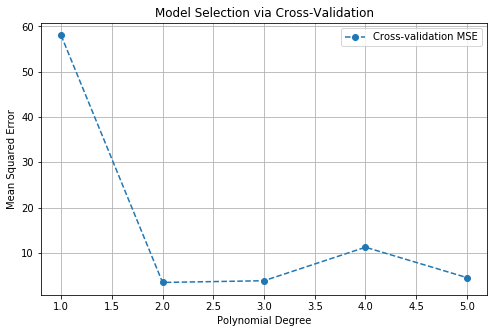

In [21]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

# Function to evaluate polynomial models using cross-validation
def cross_validate_polynomial(degree, X, y, cv_folds=5):
    """
    Fits a polynomial regression model of a given degree and evaluates its 
    predictive performance using k-fold cross-validation.
    
    Parameters:
        degree (int): Degree of the polynomial.
        X (array-like): Feature variable.
        y (array-like): Response variable.
        cv_folds (int): Number of folds in cross-validation.
    
    Returns:
        float: Mean cross-validation error.
    """
    # Create a pipeline that generates polynomial features and fits a linear regression model
    model_pipeline = Pipeline([
        ('poly_features', PolynomialFeatures(degree=degree, include_bias=False)),
        ('regressor', LinearRegression())
    ])
    
    # Perform cross-validation with negative mean squared error (MSE)
    cv_scores = cross_val_score(model_pipeline, X, y, cv=cv_folds, 
                                scoring='neg_mean_squared_error')
    
    # Return the mean cross-validation error (convert negative MSE to positive)
    return -cv_scores.mean()

# Prepare data
X = x.reshape(-1, 1)  # Reshape x to fit scikit-learn models

# Evaluate models with polynomial degrees from 1 to 5
cv_errors = []
degrees = range(1, 6)
for degree in degrees:
    error = cross_validate_polynomial(degree, X, y, cv_folds=5)
    cv_errors.append(error)
    print(f"Degree {degree}: Cross-validation MSE = {error:.4f}")

# Plot cross-validation results
plt.figure(figsize=(8, 5))
plt.plot(degrees, cv_errors, marker='o', linestyle='dashed', label='Cross-validation MSE')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.title('Model Selection via Cross-Validation')
plt.legend()
plt.grid(True)
plt.show()

### Discussion: Selecting the Best Model

- The model with the **lowest cross-validation error** is preferred since it generalizes best to unseen data.
- Unlike AIC/BIC, which rely on likelihood-based penalization, cross-validation directly measures predictive accuracy.
- If the cross-validation error increases after a certain polynomial degree, it indicates **overfitting**, meaning the model captures noise rather than signal.
- If the error is high for low-degree polynomials, it suggests **underfitting**, meaning the model is too simple to capture the data’s structure.

### Comparison: Frequentist Model Selection vs. Cross-Validation

| Method             | Objective                               | Penalizes Complexity? | Measures Prediction? |
|--------------------|----------------------------------------|-----------------------|----------------------|
| **AIC**           | Maximizes likelihood, penalizes complexity | ✅ Yes | ❌ No |
| **BIC**           | Maximizes likelihood with stronger penalty | ✅ Yes | ❌ No |
| **Adjusted \( R^2 \)** | Evaluates fit adjusted for predictors | ✅ Yes | ❌ No |
| **Cross-Validation** | Minimizes out-of-sample prediction error | ❌ No | ✅ Yes |

### **Key Takeaways**
- If the goal is **inference**, frequentist criteria (AIC, BIC, adjusted \(R^2\)) are more suitable since they balance goodness-of-fit and complexity.
- If the goal is **prediction**, cross-validation is preferable because it selects the model with the best **out-of-sample** performance.
- In practice, combining **both approaches** can lead to more robust model selection.

By applying these techniques, we can make informed decisions about model complexity, avoiding both **underfitting** and **overfitting** while ensuring strong predictive power.
